<h2><center>AB0403 Decision Making with Programming and Data Analytics 2022/2023 Semester 1</center></h2>
<h3><center>Prepared by:</center></h3>
<h3><center>Yan Tong, Andy, Dylan, See Weng, Lin Xu</center></h3>
<h3><center>Sem 7 Team 8</center></h3>

<h4><center>Data Cleaning</center></h4>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv("accidents_costs.csv")

This data file contains records of accident claims in an insurance company in a given month. It comes with information like how much is the cost of each accident (column 1), how many accident claims have been made before (column 2), the age of driver (column 3), the gender of driver with 0 refers to female and 1 refers to male in column 4, years of driving experience (column 5), the age of car (column 6), the car is parked indoor (value of 0) or outdoor (value of 1) overnight in column 7, the mileage of the car (column 8), and the number of tickets being issued before on driving offence (last column).

In [3]:
df.shape

(498, 9)

In [4]:
df.describe()

,accident_cost,num_claims,driver_age,gender,years_driving_exp,car_age,parking_indoor_outdoor,mileage,num_tickets_issued
count,497.000000,498.000000,494.000000,497.000000,498.000000,498.000000,497.000000,496.000000,497.000000
mean,2920.745674,1.461847,26.985830,0.537223,6.475904,8.937751,0.762575,8368.745968,2.468813
std,7042.462564,0.587898,3.256107,0.499115,3.017791,4.133358,0.425933,4526.458002,1.723747
min,17.800000,1.000000,21.000000,0.000000,2.000000,2.000000,0.000000,1220.000000,0.000000
25%,457.800000,1.000000,24.000000,0.000000,4.000000,6.000000,1.000000,5218.250000,1.000000
50%,1119.400000,1.000000,27.000000,1.000000,6.000000,8.000000,1.000000,7534.000000,3.000000
75%,3116.200000,2.000000,30.000000,1.000000,8.000000,11.000000,1.000000,10744.250000,4.000000
max,130870.400000,4.000000,34.000000,1.000000,27.000000,20.000000,1.000000,35105.000000,5.000000


In [5]:
df.head()

,accident_cost,num_claims,driver_age,gender,years_driving_exp,car_age,parking_indoor_outdoor,mileage,num_tickets_issued
0,310.0,1,24.0,0.0,5,20,0.0,3589.0,4.0
1,499.4,1,23.0,0.0,4,20,1.0,2834.0,5.0
2,1711.7,2,28.0,0.0,7,20,1.0,10306.0,5.0
3,1863.8,2,30.0,0.0,5,20,1.0,5233.0,5.0
4,4318.0,2,22.0,0.0,3,20,0.0,1598.0,3.0


In [6]:
df[df.duplicated()] #4 rows

,accident_cost,num_claims,driver_age,gender,years_driving_exp,car_age,parking_indoor_outdoor,mileage,num_tickets_issued
20,924.6,1,25.0,0.0,6,17,0.0,5478.0,4.0
346,29139.5,2,31.0,1.0,13,10,1.0,6067.0,4.0
375,1861.3,2,26.0,1.0,5,8,1.0,6642.0,4.0
494,2871.7,2,26.0,1.0,8,3,1.0,12143.0,3.0


All duplicated entries will be dropped. Duplicated data will skew the data set. 

In [7]:
df.drop_duplicates(keep='last',inplace=True)

In [8]:
df #494 rows left after 4 dropped

,accident_cost,num_claims,driver_age,gender,years_driving_exp,car_age,parking_indoor_outdoor,mileage,num_tickets_issued
0,310.0,1,24.0,0.0,5,20,0.0,3589.0,4.0
1,499.4,1,23.0,0.0,4,20,1.0,2834.0,5.0
2,1711.7,2,28.0,0.0,7,20,1.0,10306.0,5.0
3,1863.8,2,30.0,0.0,5,20,1.0,5233.0,5.0
4,4318.0,2,22.0,0.0,3,20,0.0,1598.0,3.0
...,...,...,...,...,...,...,...,...,...
493,5882.0,2,32.0,1.0,14,3,1.0,21994.0,1.0
494,2871.7,2,26.0,1.0,8,3,1.0,12143.0,3.0
495,26359.7,2,26.0,1.0,5,3,1.0,12927.0,1.0
496,293.8,1,31.0,1.0,6,3,1.0,8848.0,1.0


In [9]:
df.reset_index(drop=True,inplace=True) #drop old index, modify existing df

In [10]:
df

,accident_cost,num_claims,driver_age,gender,years_driving_exp,car_age,parking_indoor_outdoor,mileage,num_tickets_issued
0,310.0,1,24.0,0.0,5,20,0.0,3589.0,4.0
1,499.4,1,23.0,0.0,4,20,1.0,2834.0,5.0
2,1711.7,2,28.0,0.0,7,20,1.0,10306.0,5.0
3,1863.8,2,30.0,0.0,5,20,1.0,5233.0,5.0
4,4318.0,2,22.0,0.0,3,20,0.0,1598.0,3.0
...,...,...,...,...,...,...,...,...,...
489,5882.0,2,32.0,1.0,14,3,1.0,21994.0,1.0
490,2871.7,2,26.0,1.0,8,3,1.0,12143.0,3.0
491,26359.7,2,26.0,1.0,5,3,1.0,12927.0,1.0
492,293.8,1,31.0,1.0,6,3,1.0,8848.0,1.0


In [11]:
df.isnull().sum()

accident_cost             1
num_claims                0
driver_age                4
gender                    1
years_driving_exp         0
car_age                   0
parking_indoor_outdoor    1
mileage                   2
num_tickets_issued        1
dtype: int64

In [12]:
df[df.accident_cost < 0]

,accident_cost,num_claims,driver_age,gender,years_driving_exp,car_age,parking_indoor_outdoor,mileage,num_tickets_issued


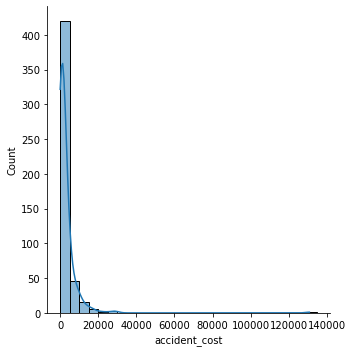

In [17]:
sns.displot(df.accident_cost,binwidth=5000,kde=True)
plt.show()

Distribution curve plot of accident cost shows a left skewed data distribution. There exist extreme data points in the series which would skew the mean. As such, we will use the median instead to impute missing values. Using median here will help negate the effects of outliers.

In [18]:
df.accident_cost.fillna(df.accident_cost.median(),inplace=True)

In [19]:
df.num_claims.value_counts(dropna=False)

1    290
2    182
3     21
4      1
Name: num_claims, dtype: int64

In [20]:
df.driver_age.value_counts(dropna=False).sort_index()

21.0    17
22.0    21
23.0    42
24.0    45
25.0    57
26.0    53
27.0    51
28.0    39
29.0    31
30.0    35
31.0    47
32.0    38
33.0    12
34.0     2
NaN      4
Name: driver_age, dtype: int64

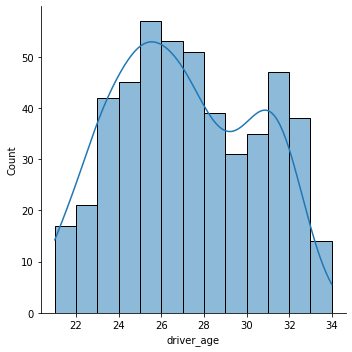

In [22]:
sns.displot(df.driver_age,binwidth=1, kde=True)
plt.show()

Distribution curve plot of driver age shows a bimodal distribution, where the data seems to be occur at two occurance more often. There does not exist extreme data points in the series which would skew the mean. Even though the graph might not resemble a normal distribution curve, we will use mean to impute missing values.

In [23]:
df.driver_age.fillna(round(df.driver_age.mean()),inplace=True)

In [24]:
df.driver_age.value_counts(dropna=False).sort_index()

21.0    17
22.0    21
23.0    42
24.0    45
25.0    57
26.0    53
27.0    55
28.0    39
29.0    31
30.0    35
31.0    47
32.0    38
33.0    12
34.0     2
Name: driver_age, dtype: int64

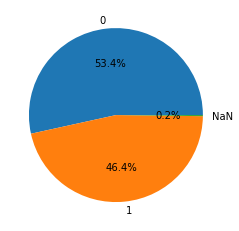

In [25]:
plt.pie(df.gender.value_counts(dropna=False),autopct='%1.1f%%',labels=['0','1','NaN'])
plt.show()

The series of gender holds categorical data. Imputation of the data will skew the results in favour of one category over another, resulting in bias. Given the small magnitude of the error, at 0.2% of the dataset, we choose to drop this row from the dataset. 

In [26]:
df.dropna(subset='gender',inplace=True)

In [27]:
df #rename 0 as F, 1 as M

,accident_cost,num_claims,driver_age,gender,years_driving_exp,car_age,parking_indoor_outdoor,mileage,num_tickets_issued
0,310.0,1,24.0,0.0,5,20,0.0,3589.0,4.0
1,499.4,1,23.0,0.0,4,20,1.0,2834.0,5.0
2,1711.7,2,28.0,0.0,7,20,1.0,10306.0,5.0
3,1863.8,2,30.0,0.0,5,20,1.0,5233.0,5.0
4,4318.0,2,22.0,0.0,3,20,0.0,1598.0,3.0
...,...,...,...,...,...,...,...,...,...
488,2294.1,1,32.0,1.0,3,3,0.0,16449.0,5.0
489,5882.0,2,32.0,1.0,14,3,1.0,21994.0,1.0
490,2871.7,2,26.0,1.0,8,3,1.0,12143.0,3.0
491,26359.7,2,26.0,1.0,5,3,1.0,12927.0,1.0


In [28]:
df.gender.replace(0,"F",inplace=True)
df.gender.replace(1,"M",inplace=True)
df

,accident_cost,num_claims,driver_age,gender,years_driving_exp,car_age,parking_indoor_outdoor,mileage,num_tickets_issued
0,310.0,1,24.0,F,5,20,0.0,3589.0,4.0
1,499.4,1,23.0,F,4,20,1.0,2834.0,5.0
2,1711.7,2,28.0,F,7,20,1.0,10306.0,5.0
3,1863.8,2,30.0,F,5,20,1.0,5233.0,5.0
4,4318.0,2,22.0,F,3,20,0.0,1598.0,3.0
...,...,...,...,...,...,...,...,...,...
488,2294.1,1,32.0,M,3,3,0.0,16449.0,5.0
489,5882.0,2,32.0,M,14,3,1.0,21994.0,1.0
490,2871.7,2,26.0,M,8,3,1.0,12143.0,3.0
491,26359.7,2,26.0,M,5,3,1.0,12927.0,1.0


In [29]:
df[df.years_driving_exp < 0]

,accident_cost,num_claims,driver_age,gender,years_driving_exp,car_age,parking_indoor_outdoor,mileage,num_tickets_issued


In [30]:
df.years_driving_exp.value_counts(dropna=False).sort_index()

2     18
3     51
4     68
5     81
6     74
7     57
8     34
9     30
10    21
11    23
12    16
13    11
14     6
15     2
27     1
Name: years_driving_exp, dtype: int64

In [31]:
np.array_equal(df.years_driving_exp,df.years_driving_exp.astype(int)) #check that all values are integers

True

All values in series "years_driving_exp" are integers (whole numbers). Data Cleaning not required.

In [32]:
df[df.car_age < 0]

,accident_cost,num_claims,driver_age,gender,years_driving_exp,car_age,parking_indoor_outdoor,mileage,num_tickets_issued


In [33]:
df.car_age.value_counts(dropna=False).sort_index()

2      2
3     20
4     39
5     44
6     50
7     70
8     41
9     42
10    35
11    35
12     8
13    27
14    21
15    25
16     7
17     6
18     4
19     5
20    12
Name: car_age, dtype: int64

In [34]:
np.array_equal(df.car_age,df.car_age.astype(int))

True

All values in series "car_age" are integers (whole numbers). Data Cleaning not required.

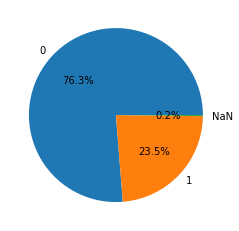

In [35]:
plt.pie(df.parking_indoor_outdoor.value_counts(dropna=False),autopct='%1.1f%%',labels=['0','1','NaN'])
plt.show()

The series of parking_indoor_outdoor holds categorical data. Imputation of the data will skew the results in favour of one category over another, resulting in bias. Given the small magnitude of the error, at 0.2% of the dataset, we will choose to drop this row from the dataset.

In [36]:
df.dropna(subset='parking_indoor_outdoor',inplace=True)

In [37]:
df

,accident_cost,num_claims,driver_age,gender,years_driving_exp,car_age,parking_indoor_outdoor,mileage,num_tickets_issued
0,310.0,1,24.0,F,5,20,0.0,3589.0,4.0
1,499.4,1,23.0,F,4,20,1.0,2834.0,5.0
2,1711.7,2,28.0,F,7,20,1.0,10306.0,5.0
3,1863.8,2,30.0,F,5,20,1.0,5233.0,5.0
4,4318.0,2,22.0,F,3,20,0.0,1598.0,3.0
...,...,...,...,...,...,...,...,...,...
488,2294.1,1,32.0,M,3,3,0.0,16449.0,5.0
489,5882.0,2,32.0,M,14,3,1.0,21994.0,1.0
490,2871.7,2,26.0,M,8,3,1.0,12143.0,3.0
491,26359.7,2,26.0,M,5,3,1.0,12927.0,1.0


In [38]:
df.parking_indoor_outdoor.replace(0,"Indoor",inplace=True)
df.parking_indoor_outdoor.replace(1,"Outdoor",inplace=True)
df

,accident_cost,num_claims,driver_age,gender,years_driving_exp,car_age,parking_indoor_outdoor,mileage,num_tickets_issued
0,310.0,1,24.0,F,5,20,Indoor,3589.0,4.0
1,499.4,1,23.0,F,4,20,Outdoor,2834.0,5.0
2,1711.7,2,28.0,F,7,20,Outdoor,10306.0,5.0
3,1863.8,2,30.0,F,5,20,Outdoor,5233.0,5.0
4,4318.0,2,22.0,F,3,20,Indoor,1598.0,3.0
...,...,...,...,...,...,...,...,...,...
488,2294.1,1,32.0,M,3,3,Indoor,16449.0,5.0
489,5882.0,2,32.0,M,14,3,Outdoor,21994.0,1.0
490,2871.7,2,26.0,M,8,3,Outdoor,12143.0,3.0
491,26359.7,2,26.0,M,5,3,Outdoor,12927.0,1.0


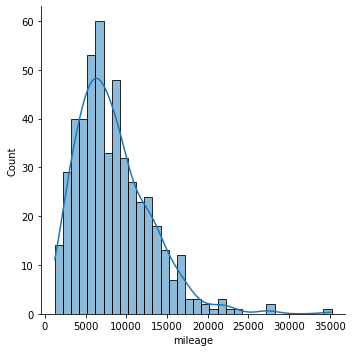

In [39]:
sns.displot(df.mileage,binwidth=1000, kde=True)

Distribution curve plot of driver age shows left skewed distribution curve. There exist extreme data points in the series which would skew the mean. As such, we will use the median instead to impute missing values. Using median here will help negate the effects of outliers.

In [40]:
df.mileage.value_counts(dropna=False).sort_index()

1220.0     1
1313.0     1
1363.0     1
1413.0     1
1598.0     1
          ..
23354.0    1
27236.0    1
27467.0    1
35105.0    1
NaN        2
Name: mileage, Length: 476, dtype: int64

In [41]:
df.mileage.fillna(df.mileage.median(),inplace=True)

In [42]:
df.mileage.value_counts(dropna=False).sort_index()

1220.0     1
1313.0     1
1363.0     1
1413.0     1
1598.0     1
          ..
22397.0    1
23354.0    1
27236.0    1
27467.0    1
35105.0    1
Name: mileage, Length: 476, dtype: int64

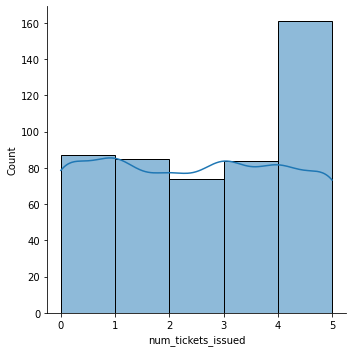

In [43]:
sns.displot(df.num_tickets_issued,binwidth=1, kde=True)

Distribution curve plot of driver age shows a uniform distribution curve. There does not exist extreme data points in the series which would skew the mean. Even though the graph might not resemble a normal distribution curve, we will use mean to impute missing values.

In [44]:
df.num_tickets_issued.value_counts(dropna=False).sort_index()

0.0    87
1.0    85
2.0    74
3.0    84
4.0    80
5.0    81
NaN     1
Name: num_tickets_issued, dtype: int64

In [45]:
df.num_tickets_issued.fillna(round(df.num_tickets_issued.mean()),inplace=True)

In [46]:
df.num_tickets_issued.value_counts(dropna=False).sort_index()

0.0    87
1.0    85
2.0    75
3.0    84
4.0    80
5.0    81
Name: num_tickets_issued, dtype: int64

In [47]:
df

,accident_cost,num_claims,driver_age,gender,years_driving_exp,car_age,parking_indoor_outdoor,mileage,num_tickets_issued
0,310.0,1,24.0,F,5,20,Indoor,3589.0,4.0
1,499.4,1,23.0,F,4,20,Outdoor,2834.0,5.0
2,1711.7,2,28.0,F,7,20,Outdoor,10306.0,5.0
3,1863.8,2,30.0,F,5,20,Outdoor,5233.0,5.0
4,4318.0,2,22.0,F,3,20,Indoor,1598.0,3.0
...,...,...,...,...,...,...,...,...,...
488,2294.1,1,32.0,M,3,3,Indoor,16449.0,5.0
489,5882.0,2,32.0,M,14,3,Outdoor,21994.0,1.0
490,2871.7,2,26.0,M,8,3,Outdoor,12143.0,3.0
491,26359.7,2,26.0,M,5,3,Outdoor,12927.0,1.0


In [48]:
df.isnull().sum()

accident_cost             0
num_claims                0
driver_age                0
gender                    0
years_driving_exp         0
car_age                   0
parking_indoor_outdoor    0
mileage                   0
num_tickets_issued        0
dtype: int64

In [49]:
df.to_csv("accidents_costs_cleaned.csv",index=False) # index = False to remove index that appears in csv

Sources:
<br>
https://towardsdatascience.com/the-ultimate-guide-to-data-cleaning-3969843991d4
<br>
https://stats.stackexchange.com/questions/143700/which-is-better-replacement-by-mean-and-replacement-by-median
<br>
https://getnave.com/blog/frequency-distribution-types/

<h4><center>Analysis</center></h4>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv("accidents_costs_cleaned.csv")

In [6]:
df

,accident_cost,num_claims,driver_age,gender,years_driving_exp,car_age,parking_indoor_outdoor,mileage,num_tickets_issued
0,310.0,1,24.0,F,5,20,Indoor,3589.0,4.0
1,499.4,1,23.0,F,4,20,Outdoor,2834.0,5.0
2,1711.7,2,28.0,F,7,20,Outdoor,10306.0,5.0
3,1863.8,2,30.0,F,5,20,Outdoor,5233.0,5.0
4,4318.0,2,22.0,F,3,20,Indoor,1598.0,3.0
...,...,...,...,...,...,...,...,...,...
487,2294.1,1,32.0,M,3,3,Indoor,16449.0,5.0
488,5882.0,2,32.0,M,14,3,Outdoor,21994.0,1.0
489,2871.7,2,26.0,M,8,3,Outdoor,12143.0,3.0
490,26359.7,2,26.0,M,5,3,Outdoor,12927.0,1.0


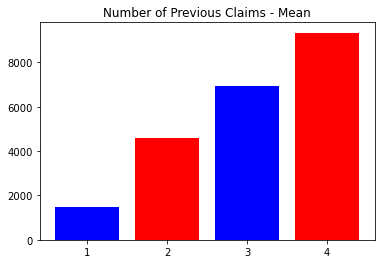

In [3]:
bars = ["1","2","3","4"]
height = df.groupby("num_claims")["accident_cost"].mean().tolist()
x_pos = np.arange(len(bars))
plt.bar(x_pos, height, color=['blue', 'red', 'blue', 'red', 'cyan'])
plt.xticks(x_pos, bars)
plt.title("Number of Previous Claims - Mean")
plt.savefig("Number of Previous claims - Mean.png",transparent=True)

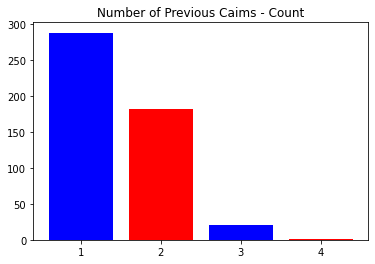

In [4]:
bars = ["1","2","3","4"]
height = df.groupby("num_claims")["accident_cost"].count().tolist()
x_pos = np.arange(len(bars))
plt.bar(x_pos, height, color=['blue', 'red', 'blue', 'red', 'cyan'])
plt.xticks(x_pos, bars)
plt.title("Number of Previous Caims - Count")
plt.savefig("Number of previous claims - Count.png",transparent=True)

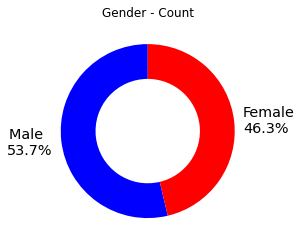

In [51]:
fig, ax = plt.subplots()
 
labels = ["Male  \n53.7%","Female\n46.3%"]

x = [53.7,46.3]

ax.pie(x, labels=labels,
       wedgeprops={'width':0.4}, 
       startangle=90, 
       colors=['blue', 'red'],
       textprops={'size': 'x-large'})

plt.title("Gender - Count")
plt.savefig("Gender - COunt.png",transparent=True)

In [53]:
df.groupby("gender")["accident_cost"].mean().round(0)


gender
F    2885.0
M    2873.0
Name: accident_cost, dtype: float64

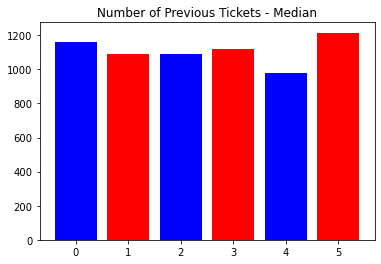

In [57]:
bars = ["0","1","2","3","4","5"]
height = df.groupby("num_tickets_issued")["accident_cost"].median().tolist()
x_pos = np.arange(len(bars))
plt.bar(x_pos, height, color=['blue','red'])
plt.xticks(x_pos, bars)
plt.title("Number of Previous Tickets - Median")
plt.savefig("Number of previous Tickets - Median.png",transparent=True)

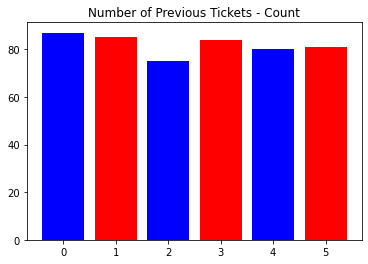

In [5]:
bars = ["0","1","2","3","4","5"]
height = df.groupby("num_tickets_issued")["accident_cost"].count().tolist()
x_pos = np.arange(len(bars))
plt.bar(x_pos, height, color=['blue','red'])
plt.xticks(x_pos, bars)
plt.title("Number of Previous Tickets - Count")
plt.savefig("Number of previous Tickets - Count.png",transparent=True)

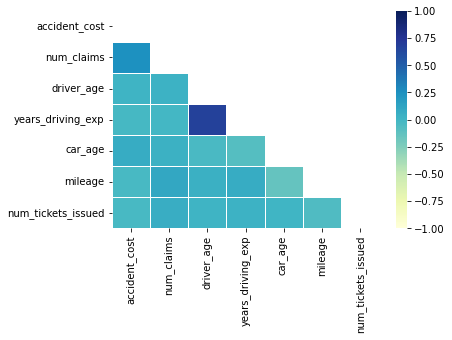

In [65]:
corr= df.corr()

# Getting the Upper Triangle of the co-relation matrix
matrix = np.triu(corr)

# using the upper triangle matrix as mask 
sns.heatmap(corr, mask=matrix,linewidths=.5, vmin=-1, vmax=1, cmap ='YlGnBu')
plt.savefig("filename.png", bbox_inches="tight",transparent=True)

In [78]:
list1 = list(df.driver_age.value_counts().sort_index().index.values)
list2 = []
for each in list1:
    x = round(each)
    list2.append(x)
print(list2)

[21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34]


[21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34]


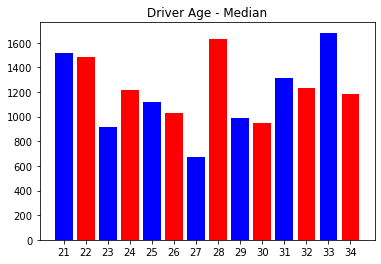

In [67]:
list1 = list(df.driver_age.value_counts().sort_index().index.values)
list2 = []
for each in list1:
    x = round(each)
    list2.append(x)
print(list2)

bars = list2
height = df.groupby("driver_age")["accident_cost"].median().tolist()
x_pos = np.arange(len(bars))
plt.bar(x_pos, height, color=['blue','red'])
plt.xticks(x_pos, bars)
plt.title("Driver Age - Median")
plt.savefig("Driver Age Median.png",transparent=True)

[21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34]


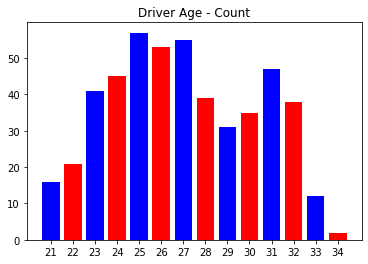

In [68]:
list1 = list(df.driver_age.value_counts().sort_index().index.values)
list2 = []
for each in list1:
    x = round(each)
    list2.append(x)
print(list2)

bars = list2
height = df.groupby("driver_age")["accident_cost"].count().tolist()
x_pos = np.arange(len(bars))
plt.bar(x_pos, height, color=['blue','red'])
plt.xticks(x_pos, bars)
plt.title("Driver Age - Count")
plt.savefig("Driver Age Count.png",transparent=True)

https://matplotlib.org/stable/gallery/color/named_colors.html